In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols = ["bike_count" , "hour" , "temp" ,"humidity" , "wind"  , "visibility" , "dew_pt_temp", "radiation" , "rain" , "snow" , "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding="latin1")
df = df.drop(["Date", "Holiday", "Seasons"], axis=1)


In [ ]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] ==12]
df = df.drop(["hour"], axis = 1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


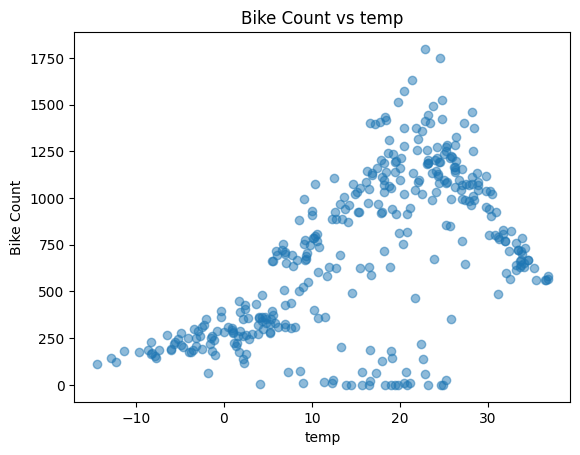

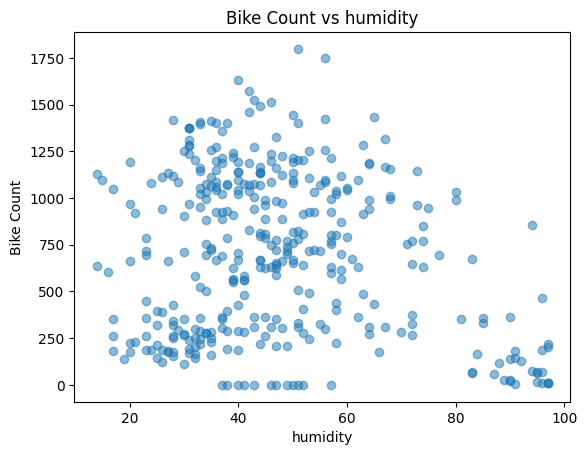

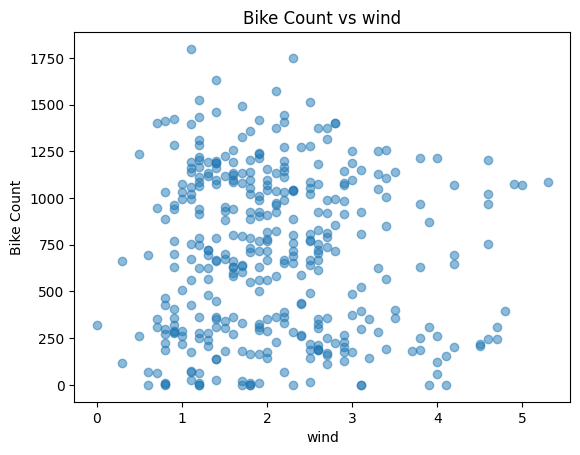

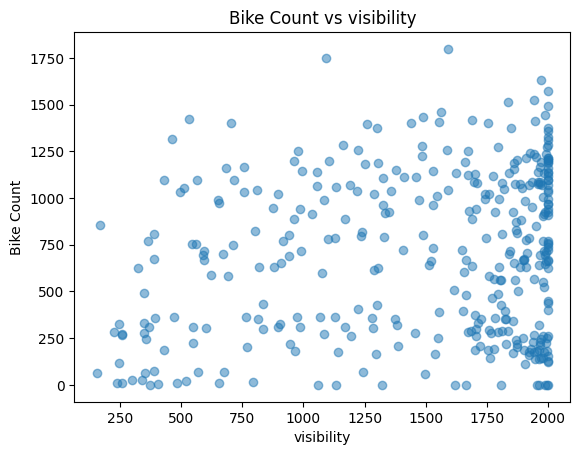

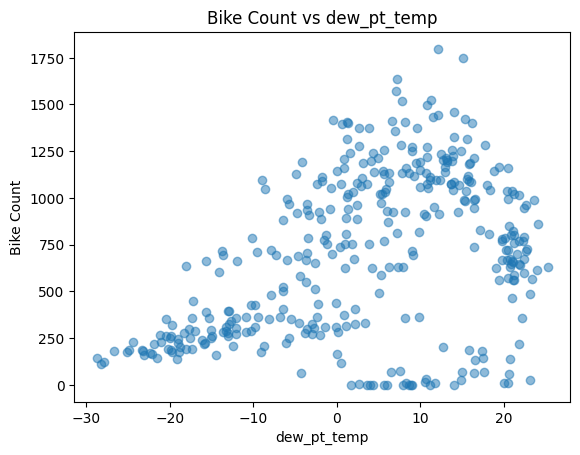

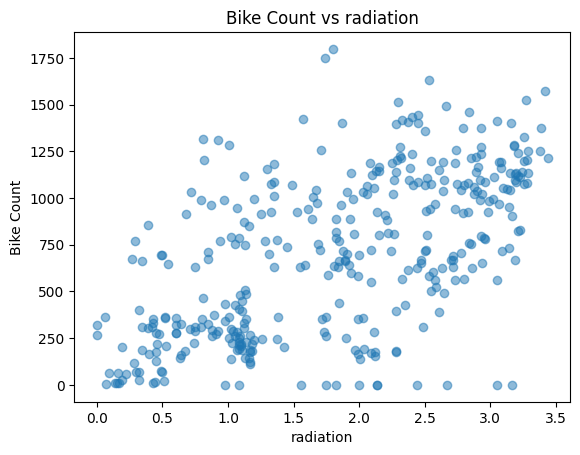

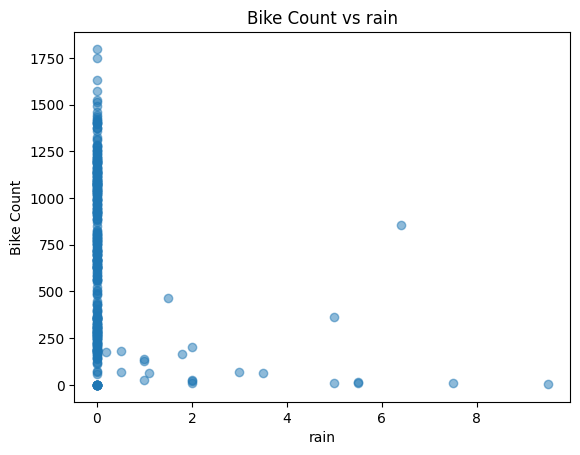

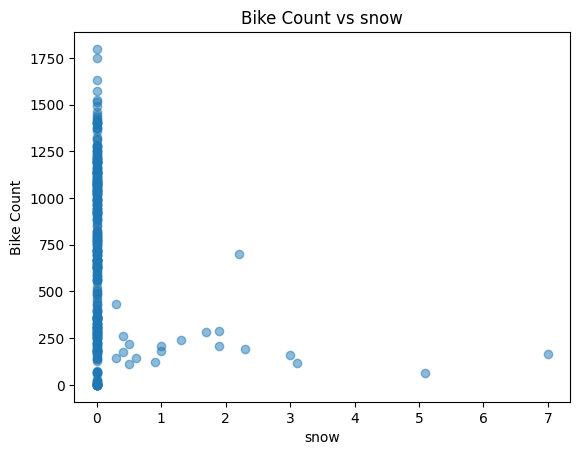

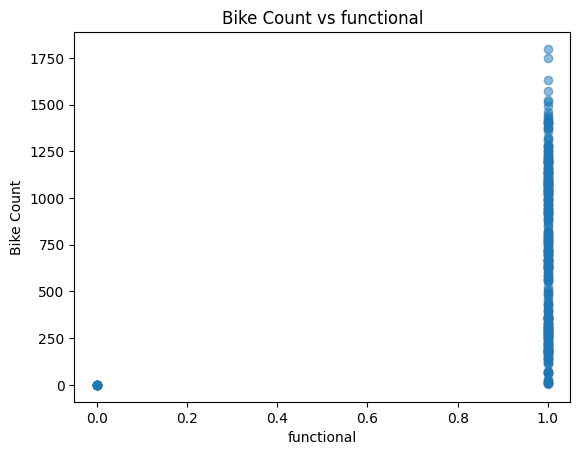

In [ ]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"], alpha=0.5)
    plt.title(f"Bike Count vs {label}")
    plt.xlabel(label)
    plt.ylabel("Bike Count")
    plt.show()


In [ ]:
df.drop(["wind" , "functional" , "visibility"] , axis = 1)

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0
...,...,...,...,...,...,...,...
8652,752,9.1,57,1.0,1.69,0.0,0.0
8676,672,9.3,61,2.1,0.85,0.0,0.0
8700,635,7.9,14,-18.0,1.81,0.0,0.0
8724,661,5.6,27,-11.9,0.34,0.0,0.0


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def get_xy(dataframe , y_label , x_labels= None):
  datadrame = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[(c for c in dataframe.columns if c!= y)]
  else:
    if len(x_labels) ==1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X,y))

  return data , X , y

In [ ]:
_, X_train_temp  , y_train_temp = get_xy(train, "bike_count", x_labels = [ "temp"])
_, X_val_temp  , y_val_temp = get_xy(val, "bike_count", x_labels = [ "temp"])
_, X_test_temp  , y_test_temp = get_xy(test, "bike_count", x_labels = [ "temp"])


In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp , y_train_temp)

LinearRegression()

In [ ]:
temp_reg.score(X_test_temp , y_test_temp)

0.38232700824610777

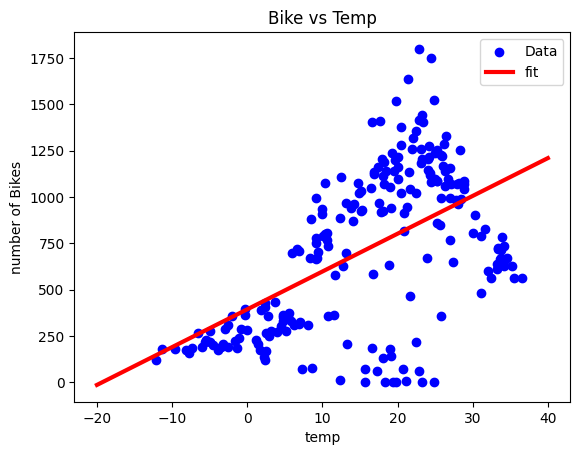

In [ ]:
plt.scatter(X_train_temp , y_train_temp, label = "Data" , color = "blue")
x = tf.linspace(-20, 40 , 100)
plt.plot(x , temp_reg.predict(np.array(x).reshape(-1,1)) , label='fit', color = "red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("number of Bikes")
plt.xlabel("temp")
plt.show()


*it#Multiple Linear Regression
alicized text*

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all  , y_train_all = get_xy(train, "bike_count", x_labels = df.columns[1:])
_, X_val_all  , y_val_all = get_xy(val, "bike_count", x_labels = df.columns[1:])
_, X_test_all  , y_test_all = get_xy(test, "bike_count", x_labels = df.columns[1:])


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all , y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.5030596241407567

#Regression with Neural Net


In [29]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [30]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis= None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [39]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss= 'mean_squared_error')

In [40]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

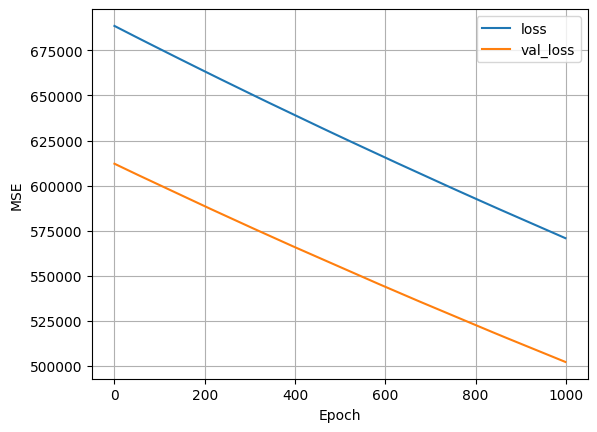

In [41]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


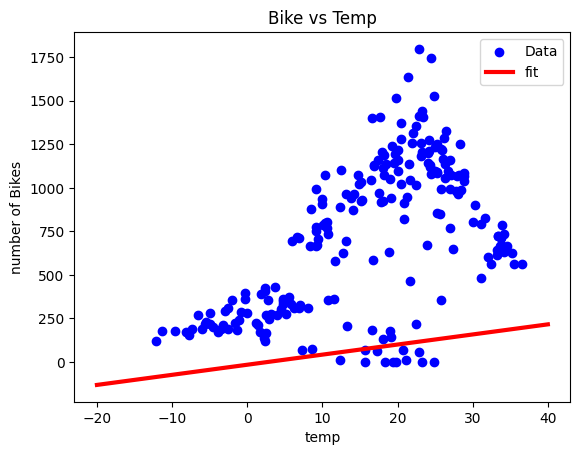

In [51]:
plt.scatter(X_train_temp , y_train_temp, label = "Data" , color = "blue")
x = tf.linspace(-20, 40 , 100)
plt.plot(x , temp_nn_model.predict(np.array(x).reshape(-1,1)) , label='fit', color = "red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("number of Bikes")
plt.xlabel("temp")
plt.show()

#Neural Net

In [47]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis= None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss= 'mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=1000
)

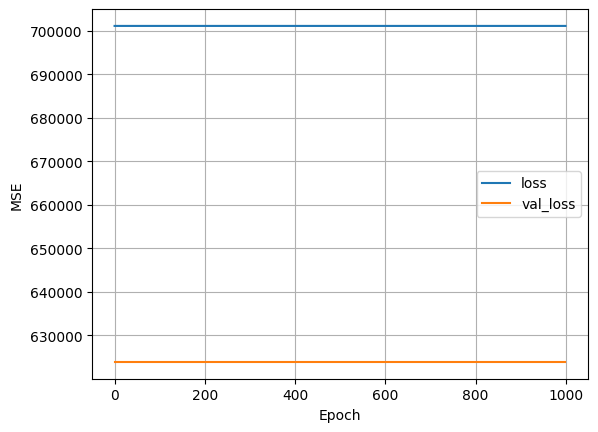

In [55]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


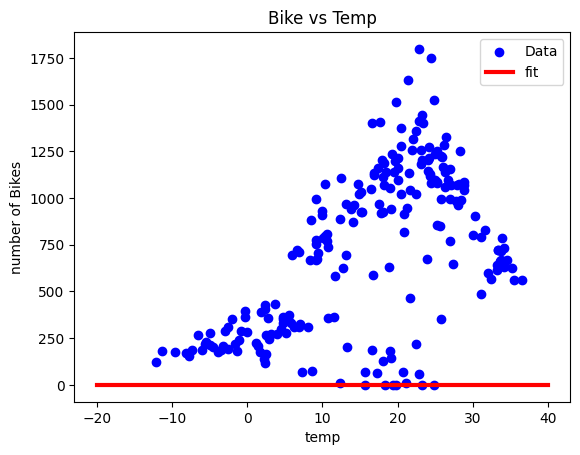

In [52]:
plt.scatter(X_train_temp , y_train_temp, label = "Data" , color = "blue")
x = tf.linspace(-20, 40 , 100)
plt.plot(x , nn_model.predict(np.array(x).reshape(-1,1)) , label='fit', color = "red", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("number of Bikes")
plt.xlabel("temp")
plt.show()